<a href="https://colab.research.google.com/github/Observersss/mss_lab_1/blob/main/mss_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Суттєві частоти: [ 7.98403194 19.96007984]


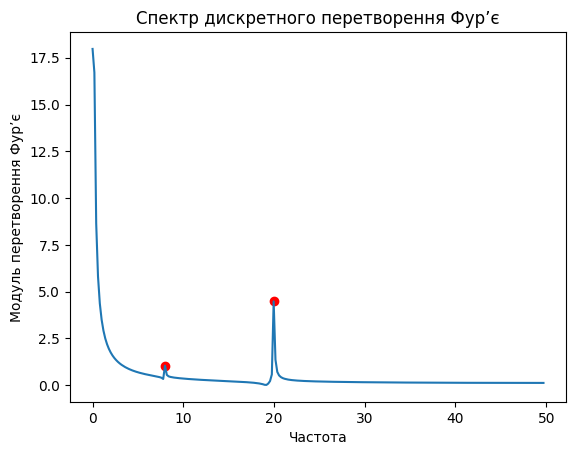

Знайдені параметри: [  0.11100943   6.05587157 -14.2325163    0.85191096   1.02857289
  -2.30921694  -1.60780517]


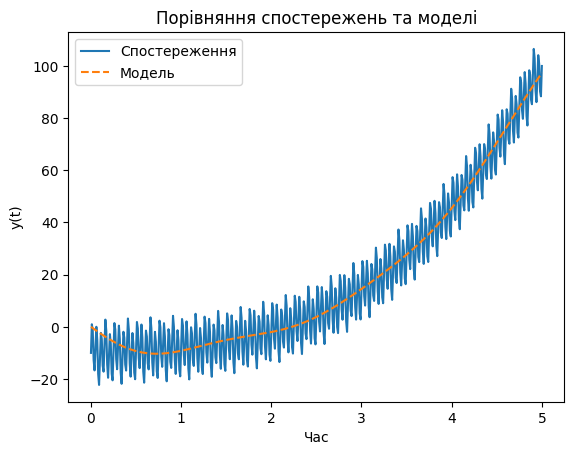

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Завантаження данних
observations = np.loadtxt('f15.txt')

T = 5
N = len(observations)
dt = 0.01
t = np.arange(0, N*dt, dt)

# 1. Дискретне перетворення Фур'є
f_transform = np.fft.fft(observations) / N
frequencies = np.fft.fftfreq(N, dt)

# Модуль перетворення Фур'є
f_magnitude = np.abs(f_transform)

# Локальні максимуми
peaks, _ = find_peaks(f_magnitude[:N // 2])
peak_frequencies = frequencies[peaks]

print("Суттєві частоти:", peak_frequencies)

# 2. Побудова графіку модуля перетворення Фур’є
plt.figure()
plt.plot(frequencies[:N // 2], f_magnitude[:N // 2])
plt.scatter(peak_frequencies, f_magnitude[peaks], color='red')
plt.xlabel('Частота')
plt.ylabel('Модуль перетворення Фур’є')
plt.title('Спектр дискретного перетворення Фур’є')
plt.show()

# 3. Метод найменших квадратів
def model(t, a1, a2, a3, *params):
    k = len(params) // 2
    y = a1 * t**3 + a2 * t**2 + a3 * t
    for i in range(k):
        fi = params[i]
        ai = params[k + i]
        y += ai * np.sin(2 * np.pi * fi * t - 3 * t)
    return y

# Ініціалізація параметрів
initial_guess = [1, 1, 1] + [1] * (len(peak_frequencies) * 2)

# 4. Підбір параметрів за методом найменших квадратів
params, covariance = curve_fit(model, t, observations, p0=initial_guess)

print("Знайдені параметри:", params)

# 5. Обчислення значень за моделлю
fitted_values = model(t, *params)

plt.figure()
plt.plot(t, observations, label='Спостереження')
plt.plot(t, fitted_values, label='Модель', linestyle='--')
plt.xlabel('Час')
plt.ylabel('y(t)')
plt.legend()
plt.title('Порівняння спостережень та моделі')
plt.show()
